## ------------------------------
## 📦 1. Imports
## ------------------------------

In [1]:
import os
import re
import string
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import csv

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gunav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## ------------------------------
## 📂 2. File Paths
## ------------------------------

In [2]:
RAW_TRAIN_PATH = '../data/raw/labeledTrainData.tsv'
RAW_TEST_PATH = '../data/raw/testData.tsv'
PREPROCESSED_DIR = '../data/preprocessed'

# Create preprocessed folder if it doesn't exist
os.makedirs(PREPROCESSED_DIR, exist_ok=True)

## ------------------------------
## 🧹 3. Preprocessing Functions
## ------------------------------

In [3]:
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_non_alphabetic(text):
    return re.sub("[^a-zA-Z]", " ", text)

def to_lowercase(text):
    return text.lower()

def remove_stopwords(text):
    stops = set(stopwords.words("english"))
    return " ".join([word for word in text.split() if word not in stops])

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def clean_text_pipeline(text):
    text = remove_html(text)
    text = to_lowercase(text)
    text = remove_punctuation(text)
    text = remove_non_alphabetic(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

## ------------------------------
## 📥 4. Load Dataset
## ------------------------------

In [4]:
def load_raw_data():
    train_df = pd.read_csv(RAW_TRAIN_PATH, delimiter='\t')
    test_df = pd.read_csv(RAW_TEST_PATH, delimiter='\t')
    return train_df, test_df

## ------------------------------
## 🧼 5. Apply Cleaning
## ------------------------------

In [5]:
def preprocess_and_save(train_df, test_df):
    train_df['clean_review'] = train_df['review'].apply(clean_text_pipeline)
    test_df['clean_review'] = test_df['review'].apply(clean_text_pipeline)

    train_df.to_csv(f'{PREPROCESSED_DIR}/train_cleaned.csv', index=False)
    test_df.to_csv(f'{PREPROCESSED_DIR}/test_cleaned.csv', index=False)
    print("✅ Cleaned files saved to data/preprocessed/")

    return train_df, test_df

## ------------------------------
## 🔍 6. Review Distributions
## ------------------------------

In [6]:
def plot_length_distribution(df, column='clean_review', label='train'):
    df['review_len'] = df[column].apply(lambda x: len(x.split()))
    print(f"{label} → Max: {df['review_len'].max()}, Min: {df['review_len'].min()}, Mean: {df['review_len'].mean():.2f}")

    plt.figure(figsize=(10, 5))
    sns.histplot(df['review_len'], bins=40, kde=True, color='green')
    plt.title(f'{label.capitalize()} Review Length Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## ------------------------------
## 📥 7. Load & Clean Unlabeled Data
## ------------------------------

In [7]:
def clean_unlabeled_data(path='../data/raw/unlabeledTrainData.tsv'):
    if not os.path.exists(path):
        print("⚠️ File not found:", path)
        return None
    
    print("🔹 Loading unlabeled data...")
    df_unlabeled = pd.read_csv(path,delimiter='\t',
                        quoting=csv.QUOTE_NONE,
                        encoding='utf-8',
                        on_bad_lines='skip'     # Skip problematic lines
                    )
    
    print("🔹 Preprocessing unlabeled reviews...")
    df_unlabeled['clean_review'] = df_unlabeled['review'].apply(clean_text_pipeline)
    
    # Save cleaned version
    out_path = os.path.join(PREPROCESSED_DIR, 'unlabeled_cleaned.csv')
    df_unlabeled.to_csv(out_path, index=False)
    print(f"✅ Cleaned unlabeled data saved to {out_path}")
    
    # Optional: plot length stats
    plot_length_distribution(df_unlabeled, label='unlabeled')
    
    return df_unlabeled


## ------------------------------
## 🚀 8. Run All Steps
## ------------------------------

🔹 Loading data...
🔹 Preprocessing train/test text...


C:\Users\gunav\AppData\Local\Temp\ipykernel_13212\3465714871.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
C:\Users\gunav\AppData\Local\Temp\ipykernel_13212\3465714871.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


✅ Cleaned files saved to data/preprocessed/
🔹 Analyzing length distributions...
train → Max: 1420, Min: 4, Mean: 120.01


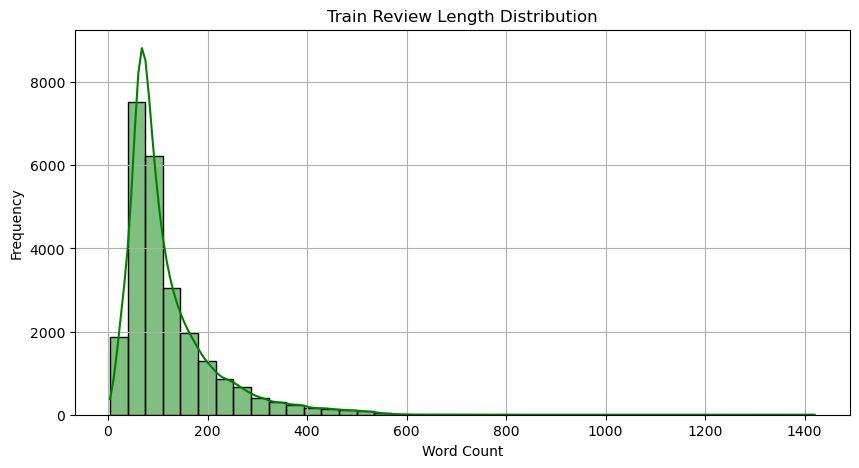

test → Max: 1140, Min: 3, Mean: 117.28


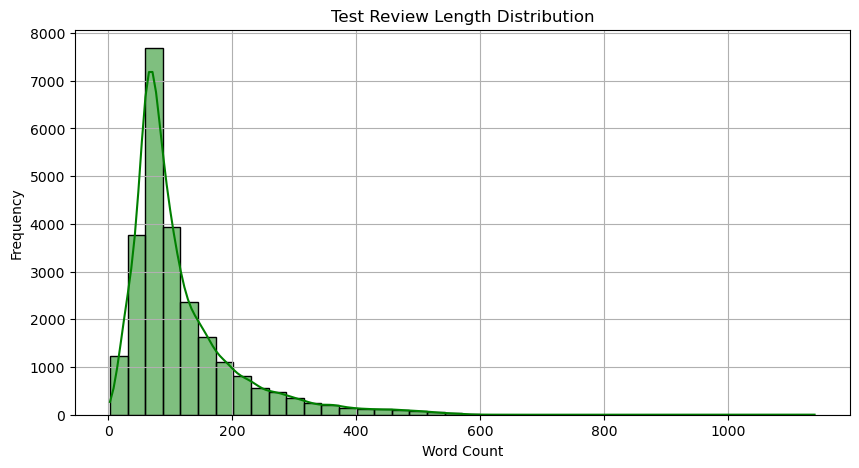

🔹 Processing unlabeled data...
🔹 Loading unlabeled data...
🔹 Preprocessing unlabeled reviews...


C:\Users\gunav\AppData\Local\Temp\ipykernel_13212\3465714871.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


✅ Cleaned unlabeled data saved to ../data/preprocessed\unlabeled_cleaned.csv
unlabeled → Max: 1333, Min: 2, Mean: 120.58


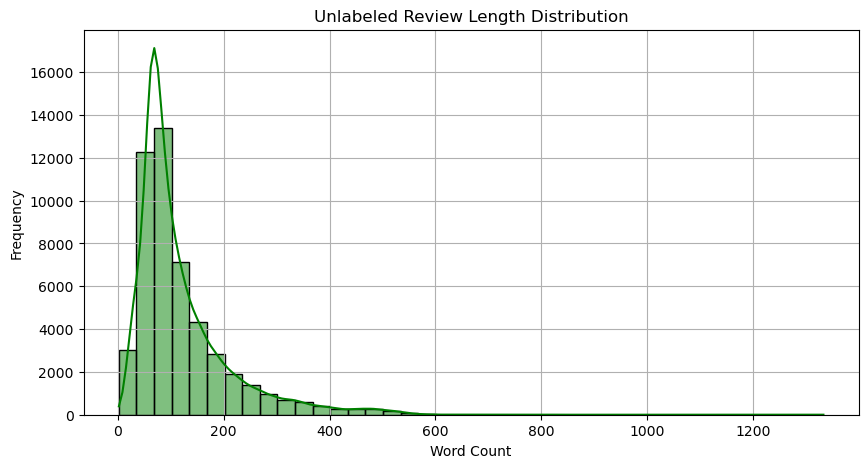

In [8]:
def main():
    print("🔹 Loading data...")
    train_df, test_df = load_raw_data()

    print("🔹 Preprocessing train/test text...")
    train_df, test_df = preprocess_and_save(train_df, test_df)

    print("🔹 Analyzing length distributions...")
    plot_length_distribution(train_df, label='train')
    plot_length_distribution(test_df, label='test')

    print("🔹 Processing unlabeled data...")
    clean_unlabeled_data()
    
main()